In [12]:
# Download data of Tesla
tesla_data = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [13]:
# Restablish a new index
tesla_data.reset_index(inplace=True)

In [14]:
# Visualize first 5 rows
print(tesla_data.head())

Price        Date Adj Close     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.074000  1.333333  1.055333  1.333333  103003500


In [19]:
pip install requests beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
!pip install yfinance
!pip install bs4
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [22]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Use yfinance to Extract Stock Data

In [24]:
tesla=yf.Ticker("TSLA")

In [25]:
tesla_data=tesla.history(period="max")

In [26]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Use Webscraping to Extract Tesla Revenue Data

In [29]:
import requests
from bs4 import BeautifulSoup

# Download the webpage
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_tesla)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Extract Tesla revenue table
tables = pd.read_html(html_data)
tesla_revenue = tables[1]  # Table at index 1
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


# Extracting GameStop Stock Data Using yfinance

In [30]:
# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for the maximum period
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())
     

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Extracting GameStop Revenue Data Using Webscraping

In [34]:
# Download the webpage
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url_gme)
html_data_2 = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

# Extract GameStop revenue table
tables = pd.read_html(html_data_2)
gme_revenue = tables[1]  # Table at index 1
gme_revenue.columns = ["Date", "Revenue"]

# Clean the data
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the last five rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31   $1667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


# Tesla Stock and Revenue Dashboard

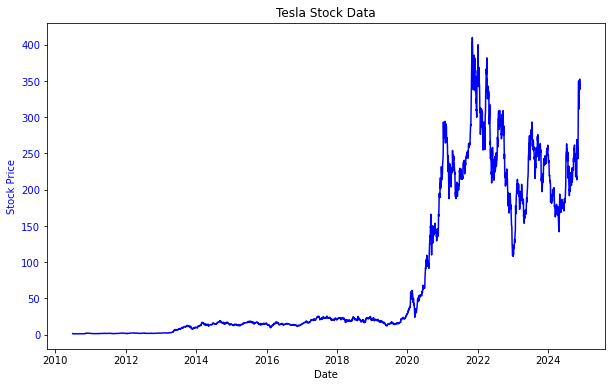

In [35]:
import matplotlib.pyplot as plt

def make_graph(data, revenue, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot stock data
    ax1.plot(data['Date'], data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(title)

    plt.show()

# Plot Tesla stock graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

# GameStop Stock and Revenue Dashboard

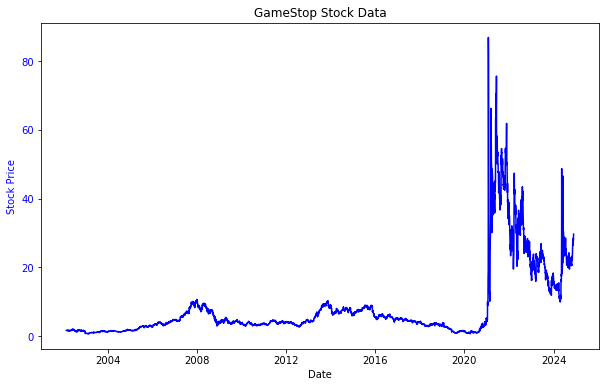

In [36]:
# Plot GameStop stock graph
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')